# Exploratory Data Analysis (EDA)

NDVI watering vs no-watering study

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


## Load data

Assumes `df` is already created as in the preprocessing step.

In [ ]:
df = pd.read_csv("data/timeseries/ndvi_CWP_2022.csv")
df.head()

,tree_id,NDVI_m3,NDVI_m4,NDVI_m5,NDVI_m6,NDVI_m7,NDVI_m8,NDVI_m9,has_watering
0,00008100:000c09d7,0.224754,0.268153,0.306351,0.276893,0.251684,0.203854,0.358751,True
1,00008100:000c09e9,0.157686,0.199009,0.183150,0.220465,0.204459,0.187151,0.210316,True
2,00008100:000c09ea,0.180522,0.211626,0.199039,0.230015,0.227425,0.216174,0.237977,True
3,00008100:000c0a20,0.309235,0.346179,0.363654,0.332270,0.322522,0.311283,0.398499,True
4,00008100:000c0a21,0.352739,0.492772,0.479558,0.477902,0.478470,0.457277,0.547352,True


In [4]:

df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tree_id       1948 non-null   object 
 1   NDVI_m3       1948 non-null   float64
 2   NDVI_m4       1948 non-null   float64
 3   NDVI_m5       1948 non-null   float64
 4   NDVI_m6       1948 non-null   float64
 5   NDVI_m7       1948 non-null   float64
 6   NDVI_m8       1948 non-null   float64
 7   NDVI_m9       1948 non-null   float64
 8   has_watering  1948 non-null   bool   
dtypes: bool(1), float64(7), object(1)
memory usage: 123.8+ KB


## Data integrity checks

In [5]:

df["tree_id"].nunique()
df["has_watering"].value_counts()
df.duplicated(subset="tree_id").sum()


np.int64(0)

## Missing values

In [6]:

df.isna().sum()
df.filter(like="NDVI").isna().mean() * 100


NDVI_m3    0.0
NDVI_m4    0.0
NDVI_m5    0.0
NDVI_m6    0.0
NDVI_m7    0.0
NDVI_m8    0.0
NDVI_m9    0.0
dtype: float64

## Summary statistics

In [7]:

df.describe()
df.groupby("has_watering").describe()


NDVI_m3                                                    \
               count      mean       std       min       25%       50%   
has_watering                                                             
False          974.0  0.345801  0.108361  0.121654  0.260934  0.337698   
True           974.0  0.285984  0.099804  0.111629  0.207609  0.263574   

                                 NDVI_m4                                \
                   75%       max   count      mean       std       min   
has_watering                                                             
False         0.421658  0.730605   974.0  0.386509  0.124316  0.118942   
True          0.343323  0.662904   974.0  0.321309  0.113205  0.108144   

                                                     NDVI_m5            \
                   25%       50%       75%       max   count      mean   
has_watering                                                             
False         0.288842  0.381605  0.476180  0.728687   974.0  0.598166   
True          0.234589  0.305795  0.397553  0.705807   974.0  0.494231   

                                                                          \
                   std       min       25%       50%       75%       max   
has_watering                                                               
False         0.156069  0.134627  0.493997  0.616256  0.718043  0.890362   
True          0.148391  0.159072  0.384089  0.492047  0.602241  0.865033   

             NDVI_m6                                                    \
               count      mean       std       min       25%       50%   
has_watering                                                             
False          974.0  0.613832  0.162808  0.139899  0.501883  0.631851   
True           974.0  0.507714  0.151004  0.160909  0.400124  0.504902   

                                 NDVI_m7                                \
                   75%       max   count      mean       std       min   
has_watering                                                             
False         0.737484  0.915398   974.0  0.584496  0.162239  0.155606   
True          0.619809  0.890195   974.0  0.480045  0.147986  0.135340   

                                                     NDVI_m8            \
                   25%       50%       75%       max   count      mean   
has_watering                                                             
False         0.473320  0.596606  0.708286  0.895193   974.0  0.561609   
True          0.372004  0.473958  0.591753  0.850354   974.0  0.455304   

                                                                          \
                   std       min       25%       50%       75%       max   
has_watering                                                               
False         0.166386  0.109063  0.444716  0.573697  0.691403  0.901977   
True          0.148159  0.127207  0.346005  0.448289  0.568381  0.834154   

             NDVI_m9                                                    \
               count      mean       std       min       25%       50%   
has_watering                                                             
False          974.0  0.610490  0.155319  0.159545  0.508729  0.631211   
True           974.0  0.510092  0.143285  0.150561  0.402996  0.512409   

                                  
                   75%       max  
has_watering                      
False         0.731207  0.896729  
True          0.618003  0.851193

## Convert to long format for plotting

In [8]:

df_long = df.melt(
    id_vars=["tree_id", "has_watering"],
    value_vars=[c for c in df.columns if c.startswith("NDVI_m")],
    var_name="month",
    value_name="NDVI"
)

df_long["month"] = df_long["month"].str.replace("NDVI_m", "").astype(int)
df_long.head()


,tree_id,has_watering,month,NDVI
0,00008100:000c09d7,True,3,0.224754
1,00008100:000c09e9,True,3,0.157686
2,00008100:000c09ea,True,3,0.180522
3,00008100:000c0a20,True,3,0.309235
4,00008100:000c0a21,True,3,0.352739


## NDVI distribution by month

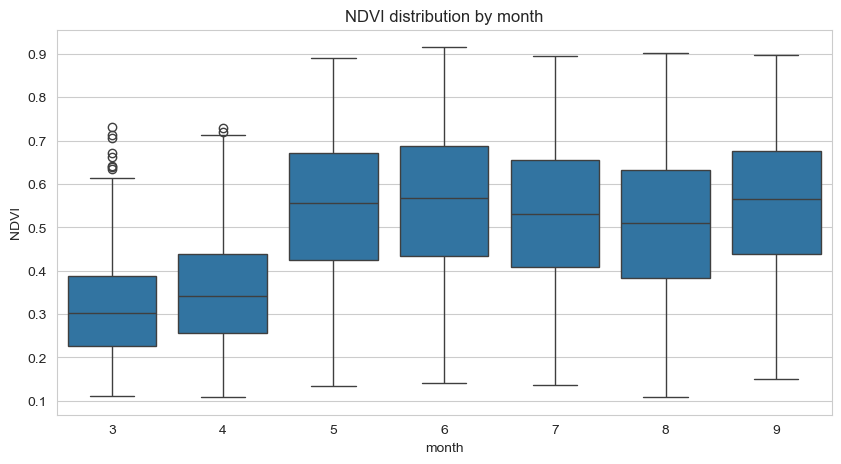

In [9]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_long, x="month", y="NDVI")
plt.title("NDVI distribution by month")
plt.show()


## Watering vs no-watering

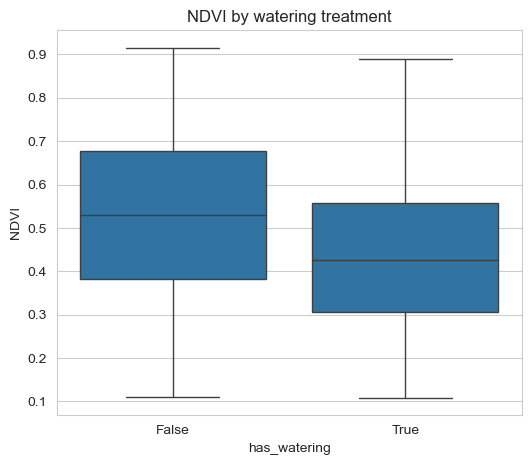

In [10]:

plt.figure(figsize=(6, 5))
sns.boxplot(data=df_long, x="has_watering", y="NDVI")
plt.title("NDVI by watering treatment")
plt.show()


## NDVI trend over time

/var/folders/_d/r6vqd8xn11sb_7lc0mrn4bcr0000gn/T/ipykernel_62912/1892233794.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


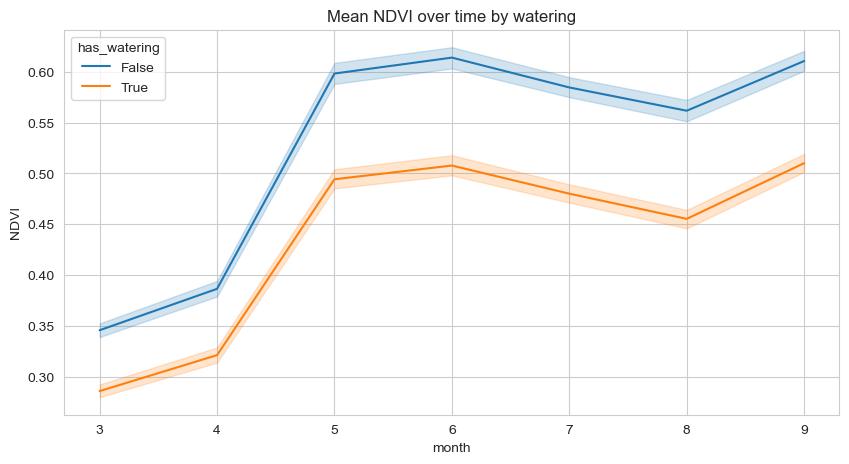

In [11]:

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_long,
    x="month",
    y="NDVI",
    hue="has_watering",
    estimator="mean",
    ci=95
)
plt.title("Mean NDVI over time by watering")
plt.show()


## Correlation between months

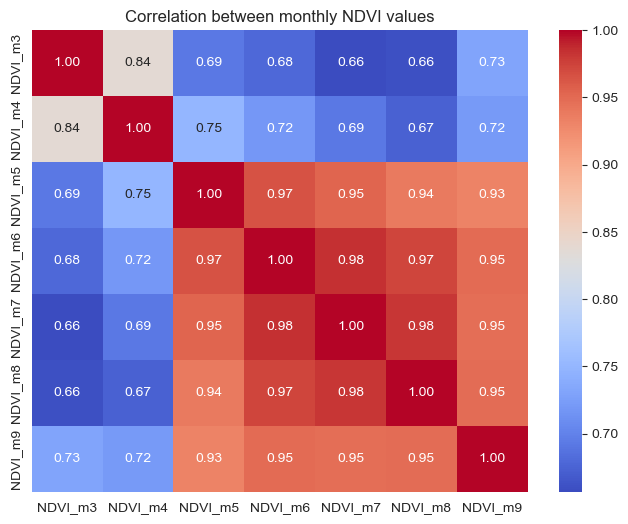

In [12]:

ndvi_cols = [c for c in df.columns if c.startswith("NDVI_m")]

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[ndvi_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation between monthly NDVI values")
plt.show()


## Statistical comparison

In [13]:

from scipy.stats import ttest_ind

watering = df_long[df_long["has_watering"]]["NDVI"].dropna()
no_watering = df_long[~df_long["has_watering"]]["NDVI"].dropna()

ttest_ind(watering, no_watering, equal_var=False)


TtestResult(statistic=np.float64(-31.248152358792723), pvalue=np.float64(5.404955394771465e-207), df=np.float64(13449.20753850726))

## EDA conclusions

- Seasonal NDVI trends
- Watering effect
- Variability across trees